# Problem 1 : Euler–Mascheroni constant

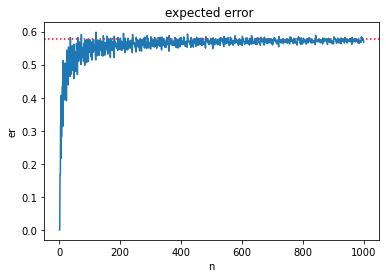

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(n):
    return sum( np.ceil(n/r) - n/r for r in range(1, n) )/n
N = 1000
euler_gamma = 0.5772
x = np.arange(1, N)
y = [f(n) for n in x]
plt.axhline(y=euler_gamma, linestyle=":",color="red")
plt.xlabel('n')
plt.ylabel('er')
plt.title('expected error ')
plt.plot(x, y)
plt.show()

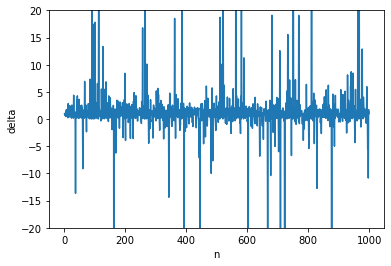

In [4]:
deltan = [(f(n+1) - euler_gamma) / (f(n) - euler_gamma) for n in x]
plt.plot(x, deltan)
plt.xlabel('n')
plt.ylabel('delta')
plt.ylim(-20,20)
plt.show()

# Problem 2 : Newton–Pepys Problem

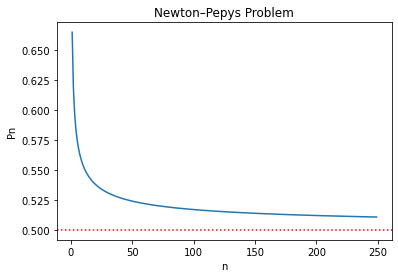

In [51]:
import math
def h(n):
    return 1-sum( math.factorial(6*n)/(math.factorial(i)*math.factorial(6*n-i))*
                 (1/6)**i*(5/6)**(6*n-i) for i in range(0,n) )
Q = 250
x = np.arange(1, Q)
y = [h(n) for n in x]
plt.axhline(y=0.5, linestyle=":",color="red")
plt.xlabel('n')
plt.ylabel('Pn')
plt.title('Newton–Pepys Problem')
plt.plot(x, y)
plt.show()

# Problem 3 : Neper Constant Monte Carlo Way

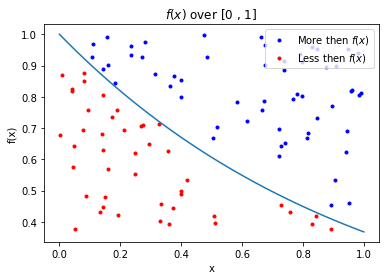


The value of e is :  2.785714


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random 
N=100
xi = []
yi = []
xo = []
yo = []
x = np.linspace(0,1)
y = np.exp(-x)
inner_points = 0
for i in range(N): 
  
    rand_x= random.uniform(0, 1) 
    rand_y= random.uniform(np.exp(-1), 1) 
  
    origin_dist= rand_y - np.exp(-rand_x)
  
    if origin_dist<= 0: 
        inner_points+= 1
        xi.append(rand_x)
        yi.append(rand_y)
    else :
        xo.append(rand_x)
        yo.append(rand_y)
        
plt.scatter(xo, yo, marker='.', color='b',label = 'More then $f(x)$')
plt.scatter(xi, yi, marker='.', color='r',label = 'Less then $f(x)$')
plt.legend(loc='upper right')
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x)$ over [0 , 1] ')
plt.show()
S=inner_points / 100
e=(2-S)/(1-S)
print("\nThe value of e is : ", "%f" % e)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random 
N=100
x = np.linspace(0,1)
y = np.exp(-x)
n = np.arange(1, N)
e=[0]*40
for i in range(40):
    inner_points = 0
    for l in range (N) :
        rand_x= random.uniform(0, 1) 
        rand_y= random.uniform(np.exp(-1), 1) 
  
        origin_dist= rand_y - np.exp(-rand_x)
  
        if origin_dist<= 0: 
            inner_points+= 1
        
    S = inner_points / 100
    
    e[i]=(2-S)/(1-S)
Mean=sum(e)/40
Var = 0
for k in range(40) :
    Var += (e[k] - Mean)**2
Var /= 40
plt.show()
print("\nThe value of Mean is : ", "%f" % Mean)
print("\nThe value of Variance is : ", "%f" % Var)


The value of Mean is :  2.735041

The value of Variance is :  0.025887


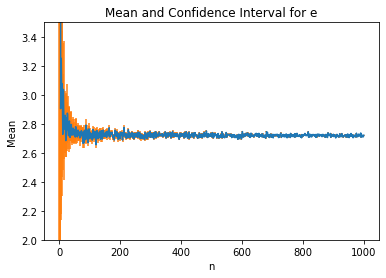

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import random 
N=1000
x = np.linspace(0,1)
y = np.exp(-x)
n = np.arange(1, N)
e=[0]*40
Mean=[]
Var=[]
for j in range(1, N):
    for i in range(40):
        inner_points = 0
        for l in range (j) :
            rand_x= random.uniform(0, 1) 
            rand_y= random.uniform(np.exp(-1), 1) 
  
            origin_dist= rand_y - np.exp(-rand_x)
  
            if origin_dist<= 0: 
                inner_points+= 1
        
        S = inner_points / j
        if S==1 :
            e[i] = 1000000
        else :
            e[i]=(2-S)/(1-S)
    Mean.append(sum(e)/40)
    dvar = 0
    for k in range(40) :
        dvar += (e[k] - Mean[j-1])**2
    Var.append(dvar/40)

std = np.sqrt(Var)
plt.plot(n,Mean)
plt.ylim(2,3.5)
plt.errorbar(n, Mean, yerr=1.96*std/np.sqrt(n), linestyle='')
plt.xlabel('n')
plt.ylabel('Mean')
plt.title('Mean and Confidence Interval for e')
plt.show()

# Problem 4 : Random Fibonacci Sequence


The value of alpha is :  1.128627


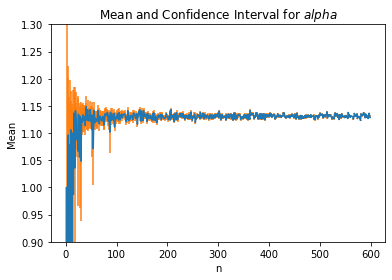

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rand_fib(length):
    f = np.ones(length)
    for i in range(2, length):
        b = np.random.choice((-1,1))
        f[i] = f[i-1] + b*f[i-2]
    return f
N = 600
n = np.arange(0, N)
yMean= [0]*N
yStd = [0]*N
ic = [0]*N
for i in range(1,N) :
    y = [abs(rand_fib(i)[-1])**(1/i) for _ in range(40)]
    yMean[i] = (np.mean(y))
    yStd[i] =(np.std(y))
for i in range(1,N) :
    ic[i] = 1.96*yStd[i]/np.sqrt(i)
plt.plot(n,yMean)
plt.errorbar(n, yMean, yerr = ic, linestyle='')
plt.ylim(0.9,1.3)
plt.xlabel('n')
plt.ylabel('Mean')
plt.title('Mean and Confidence Interval for $alpha$')
print("\nThe value of alpha is : ", "%f" % yMean[-1])
plt.show()


The value of landa is :  0.021441


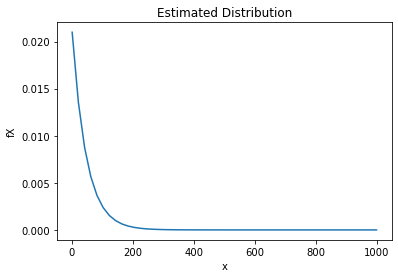

In [320]:
import numpy as np
import matplotlib.pyplot as plt

def rand_fib(length):
    f = np.ones(length)
    for i in range(2, length):
        b = np.random.choice((-1,1))
        f[i] = f[i-1] + b*f[i-2]
    return f
N = 25
y = [max(rand_fib(N)) for _ in range(100)]
landa = 100/sum(y)
x = np.linspace(1, 1000)
y1=landa*np.exp(-landa*x)
plt.plot(x,y1)
plt.xlabel('x')
plt.ylabel('fX')
plt.title('Estimated Distribution')
print("\nThe value of landa is : ", "%f" % landa)
plt.show()

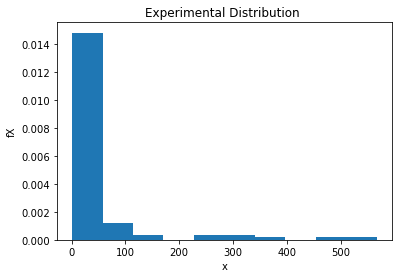

In [326]:
import numpy as np
import matplotlib.pyplot as plt

def rand_fib(length):
    f = np.ones(length)
    for i in range(2, length):
        b = np.random.choice((-1,1))
        f[i] = f[i-1] + b*f[i-2]
    return f
N = 25
y = [max(rand_fib(N)) for _ in range(100)]
landa = 100/sum(y)
plt.hist(y, density ='True')
plt.xlabel('x')
plt.ylabel('fX')
plt.title('Experimental Distribution ')
plt.show()

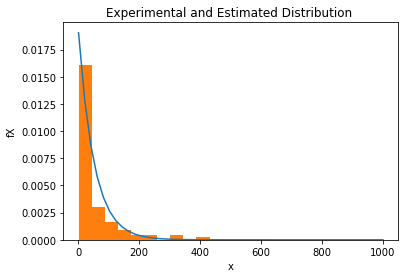

In [330]:
import numpy as np
import matplotlib.pyplot as plt

def rand_fib(length):
    f = np.ones(length)
    for i in range(2, length):
        b = np.random.choice((-1,1))
        f[i] = f[i-1] + b*f[i-2]
    return f
N = 25
y = [max(rand_fib(N)) for _ in range(100)]
landa = 100/sum(y)
x = np.linspace(1, 1000)
y1=landa*np.exp(-landa*x)
plt.plot(x,y1)
plt.hist(y, density ='True')
plt.xlabel('x')
plt.ylabel('fX')
plt.title('Experimental and Estimated Distribution ')
plt.show()

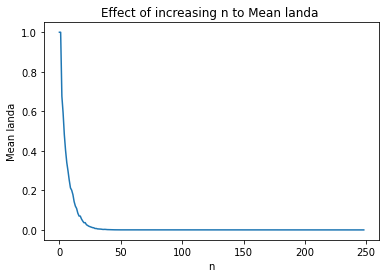

In [347]:
import numpy as np
import matplotlib.pyplot as plt

def rand_fib(length):
    f = np.ones(length)
    for i in range(2, length):
        b = np.random.choice((-1,1))
        f[i] = f[i-1] + b*f[i-2]
    return f

N = 250
landa_mean = []
landa = [0]*30
for i in range(1,N) :
    for j in range(30) :
        y = [max(rand_fib(i)) for _ in range(30)]
        landa[j] = 30/sum(y)
        
    landa_mean.append(sum(landa)/30)

plt.plot(landa_mean)
plt.xlabel('n')
plt.ylabel('Mean landa')
plt.title('Effect of increasing n to Mean landa ')
plt.show()

# Problem 5 : Circle Law

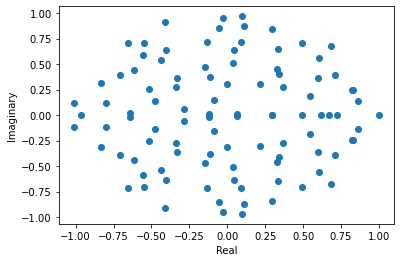

In [43]:
import matplotlib.pyplot as plt
import numpy as np
    
n = 100
M = np.random.normal(0,np.sqrt((1 / n)) , (n, n))
w = np.linalg.eigvals(M)
plt.scatter(np.real(w), np.imag(w))
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

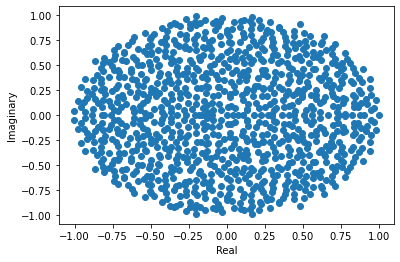

In [44]:
import matplotlib.pyplot as plt
import numpy as np
    
n = 1000
M = np.random.normal(0,np.sqrt((1 / n)) , (n, n))
w = np.linalg.eigvals(M)
plt.scatter(np.real(w), np.imag(w))
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

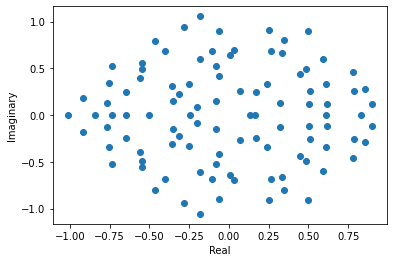

In [55]:
import matplotlib.pyplot as plt
import numpy as np
    
n = 100
M = np.random.uniform(-np.sqrt(3 / n),np.sqrt(3 / n),(n,n))
w = np.linalg.eigvals(M)
plt.scatter(np.real(w), np.imag(w))
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

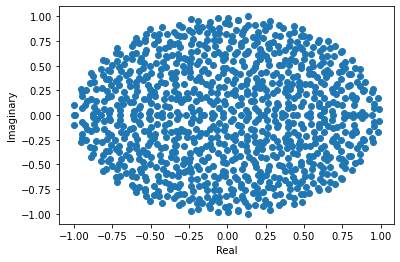

In [54]:
import matplotlib.pyplot as plt
import numpy as np
    
n = 1000
M = np.random.uniform(-np.sqrt(3 / n),np.sqrt(3 / n),(n,n))
w = np.linalg.eigvals(M)
plt.scatter(np.real(w), np.imag(w))
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

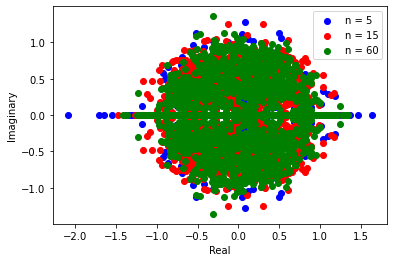

In [346]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

N1 = 5
n1 = [0]*100
N2 = 15
n2 = [0]*100
N3 = 60
n3 = [0]*100
for i in range(100) :
    M1 = np.random.normal(0,np.sqrt((1 / N1)) , (N1, N1))
    w1 = np.linalg.eigvals(M1)
    n1[i] = w1

for i in range(100) :
    M2 = np.random.normal(0,np.sqrt((1 / N2)) , (N2, N2))
    w2 = np.linalg.eigvals(M2)
    n2[i] = w2
    
for i in range(100) : 
    M3 = np.random.normal(0,np.sqrt((1 / N2)) , (N2, N2))
    w3 = np.linalg.eigvals(M3)
    n3[i] = w3

plt.scatter(np.real(n1), np.imag(n1),color='b', label = 'n = 5')
plt.scatter(np.real(n2), np.imag(n2),color='r', label = 'n = 15')
plt.scatter(np.real(n3), np.imag(n3),color='g', label = 'n = 60')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc='best')
plt.show()

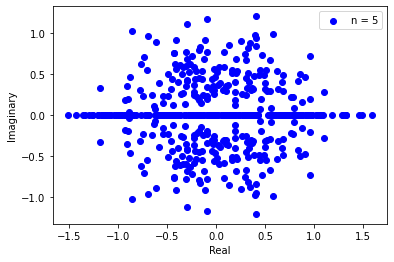

In [343]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

N1 = 5
n1 = [0]*100
for i in range(100) :
    M1 = np.random.normal(0,np.sqrt((1 / N1)) , (N1, N1))
    w1 = np.linalg.eigvals(M1)
    n1[i] = w1

plt.scatter(np.real(n1), np.imag(n1),color='b', label = 'n = 5')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc='best')
plt.show()

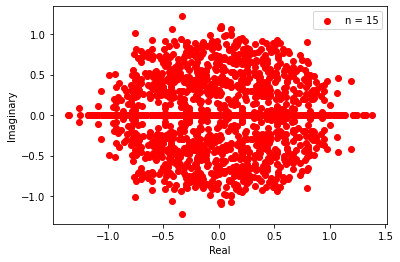

In [344]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

N2 = 15
n2 = [0]*100

for i in range(100) :
    M2 = np.random.normal(0,np.sqrt((1 / N2)) , (N2, N2))
    w2 = np.linalg.eigvals(M2)
    n2[i] = w2

plt.scatter(np.real(n2), np.imag(n2),color='r', label = 'n = 15')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc='best')
plt.show()

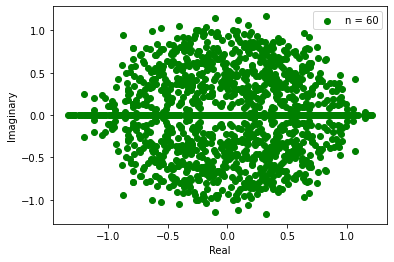

In [345]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

N3 = 60
n3 = [0]*100
for i in range(100) : 
    M3 = np.random.normal(0,np.sqrt((1 / N2)) , (N2, N2))
    w3 = np.linalg.eigvals(M3)
    n3[i] = w3

plt.scatter(np.real(n3), np.imag(n3),color='g', label = 'n = 60')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc='best')
plt.show()